In [1]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.5 MB/s eta 0:00:00


2025-04-20 16:07:10.572158: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745165230.803250      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745165230.873453      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 4571 images belonging to 4 classes.


I0000 00:00:1745165256.010534      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1745165265.233645      72 service.cc:148] XLA service 0x79bb44004330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745165265.234742      72 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1745165265.923915      72 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/143 ━━━━━━━━━━━━━━━━━━━━ 14:56 6s/step

I0000 00:00:1745165268.599009      72 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


143/143 ━━━━━━━━━━━━━━━━━━━━ 36s 212ms/step


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


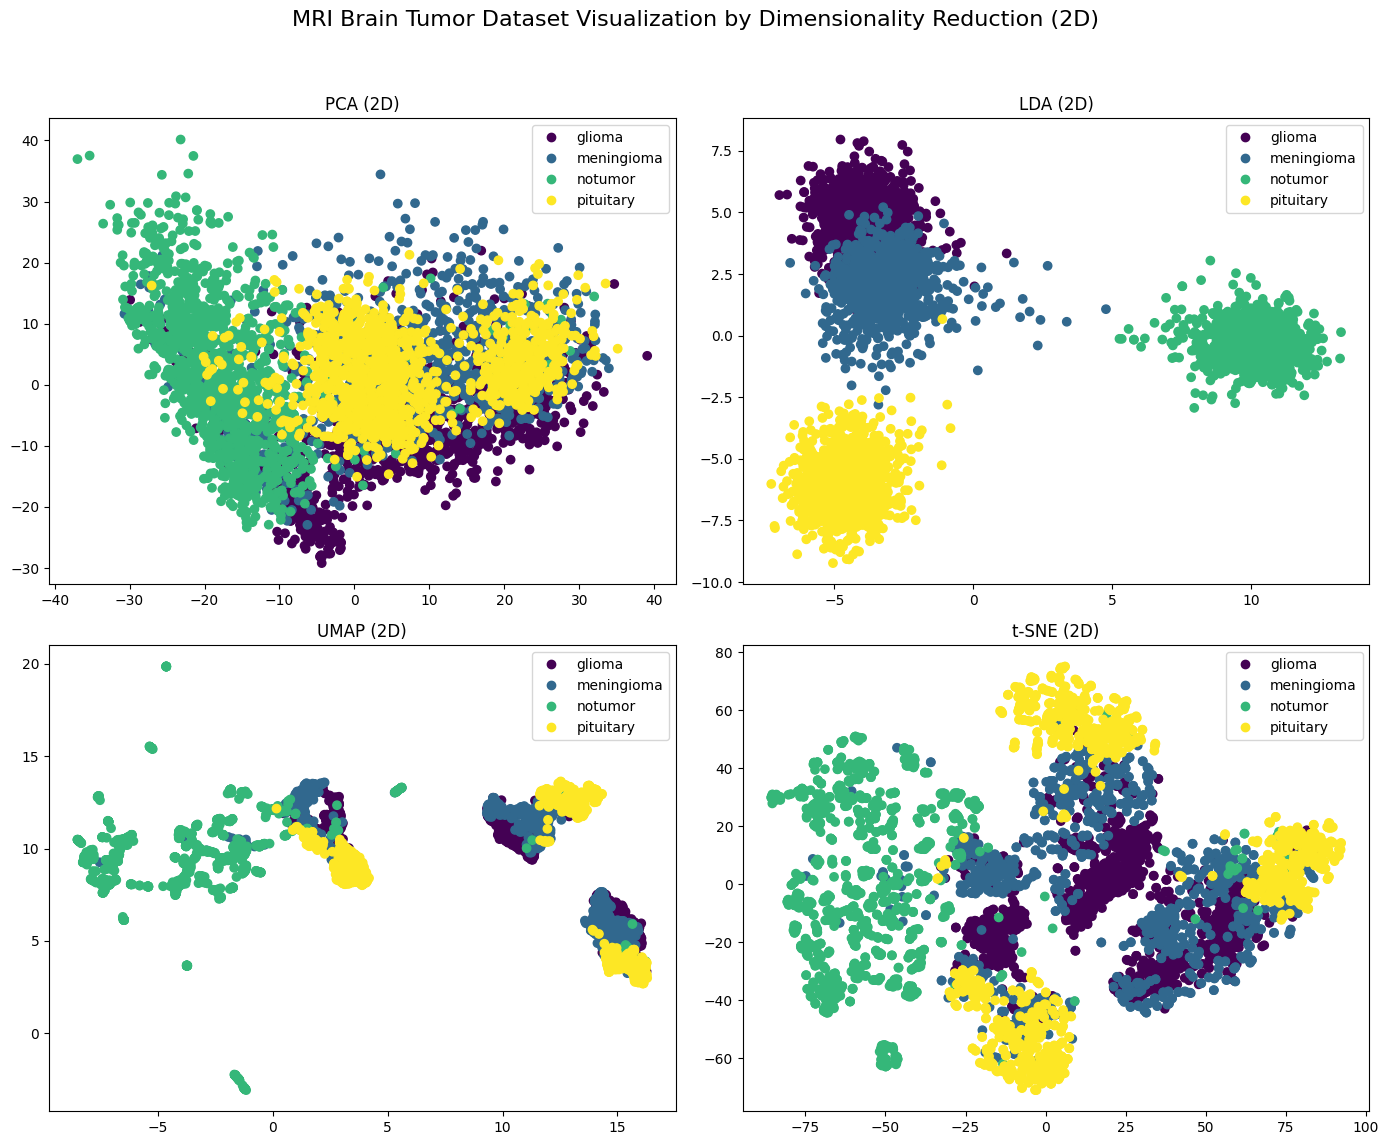

In [2]:
# MRI 2D Visualize
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Suppress OpenBLAS warnings
os.environ["OMP_NUM_THREADS"] = "1"

# Dataset path
train_dir = '/kaggle/input/brain-tumor-mri-dataset/Training'
IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 32

# Image generator
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=False
)

# Feature extraction using ResNet50
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), pooling='avg')
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

features = feature_extractor.predict(train_generator, verbose=1)
labels = train_generator.classes
class_labels = list(train_generator.class_indices.keys())

# PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

# LDA
lda = LDA(n_components=2)
features_lda = lda.fit_transform(features, labels)

# UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
features_umap = umap_model.fit_transform(features)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(features)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('MRI Brain Tumor Dataset Visualization by Dimensionality Reduction (2D)', fontsize=16)

# PCA
ax = axs[0, 0]
scatter = ax.scatter(features_pca[:, 0], features_pca[:, 1], c=labels, cmap='viridis')
ax.set_title('PCA (2D)')
ax.legend(handles=scatter.legend_elements()[0], labels=class_labels)

# LDA
ax = axs[0, 1]
scatter = ax.scatter(features_lda[:, 0], features_lda[:, 1], c=labels, cmap='viridis')
ax.set_title('LDA (2D)')
ax.legend(handles=scatter.legend_elements()[0], labels=class_labels)

# UMAP
ax = axs[1, 0]
scatter = ax.scatter(features_umap[:, 0], features_umap[:, 1], c=labels, cmap='viridis')
ax.set_title('UMAP (2D)')
ax.legend(handles=scatter.legend_elements()[0], labels=class_labels)

# t-SNE
ax = axs[1, 1]
scatter = ax.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='viridis')
ax.set_title('t-SNE (2D)')
ax.legend(handles=scatter.legend_elements()[0], labels=class_labels)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Found 4571 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step


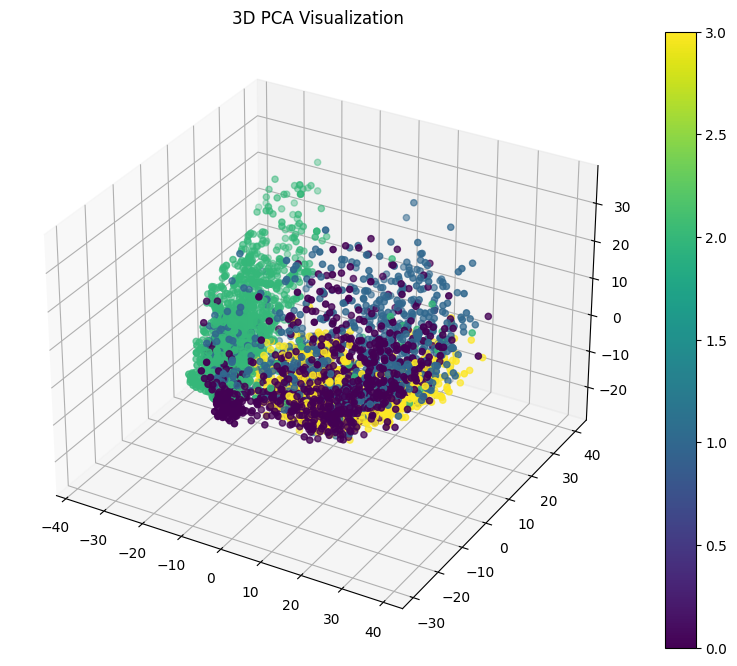

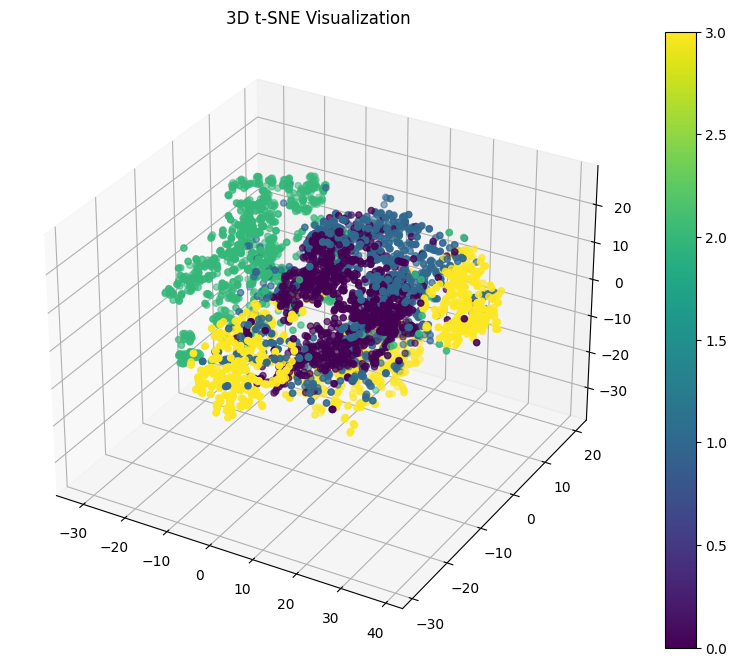

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


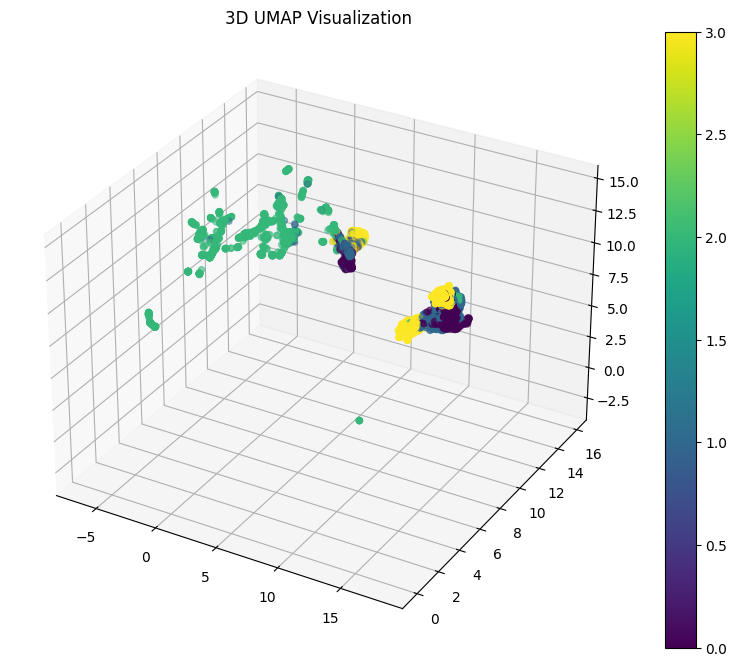

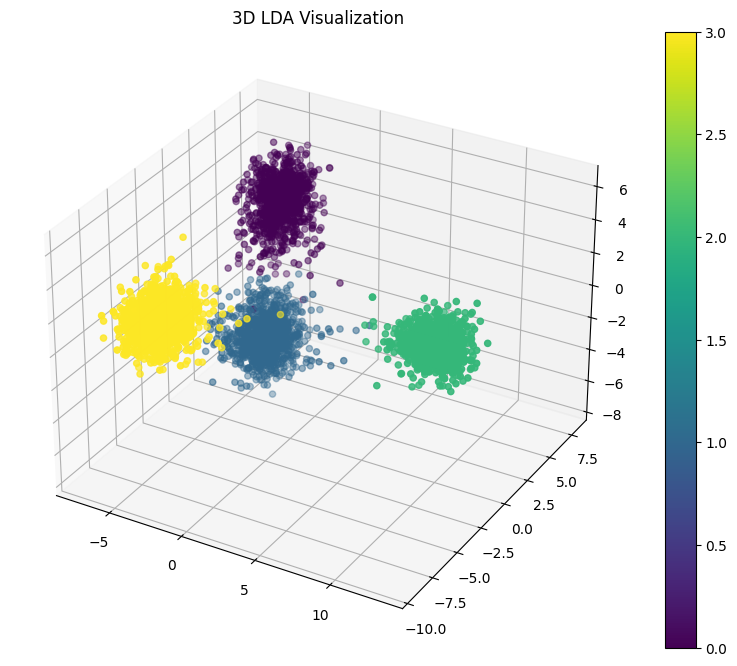

In [3]:
# MRI XAI PCA t-SNE UMAP LDA AE MDS SOM
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Prevent OpenBLAS hang warnings
os.environ["OMP_NUM_THREADS"] = "1"

# Paths
train_dir = '/kaggle/input/brain-tumor-mri-dataset/Training'
test_dir = '/kaggle/input/brain-tumor-mri-dataset/Testing'
# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 32

# Data generator with ResNet50 preprocessing
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=False  # Important for consistent labels
)

# Load ResNet50 (exclude top), freeze weights
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), pooling='avg')
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Extract features and labels
features = feature_extractor.predict(train_generator, verbose=1)
labels = train_generator.classes

# 1. PCA (3D)
pca_3d = PCA(n_components=3)
features_pca_3d = pca_3d.fit_transform(features)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(features_pca_3d[:, 0], features_pca_3d[:, 1], features_pca_3d[:, 2], c=labels, cmap='viridis')
ax.set_title('3D PCA Visualization')
fig.colorbar(scatter)
plt.show()

# 2. t-SNE (3D)
tsne_3d = TSNE(n_components=3, random_state=42)
features_tsne_3d = tsne_3d.fit_transform(features)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(features_tsne_3d[:, 0], features_tsne_3d[:, 1], features_tsne_3d[:, 2], c=labels, cmap='viridis')
ax.set_title('3D t-SNE Visualization')
fig.colorbar(scatter)
plt.show()

# 3. UMAP (3D)
umap_model_3d = umap.UMAP(n_components=3, random_state=42)
features_umap_3d = umap_model_3d.fit_transform(features)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(features_umap_3d[:, 0], features_umap_3d[:, 1], features_umap_3d[:, 2], c=labels, cmap='viridis')
ax.set_title('3D UMAP Visualization')
fig.colorbar(scatter)
plt.show()

# 4. LDA (3D)
lda = LDA(n_components=3)
features_lda_3d = lda.fit_transform(features, labels)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(features_lda_3d[:, 0], features_lda_3d[:, 1], features_lda_3d[:, 2], c=labels, cmap='viridis')
ax.set_title('3D LDA Visualization')
fig.colorbar(scatter)
plt.show()




Found 4571 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


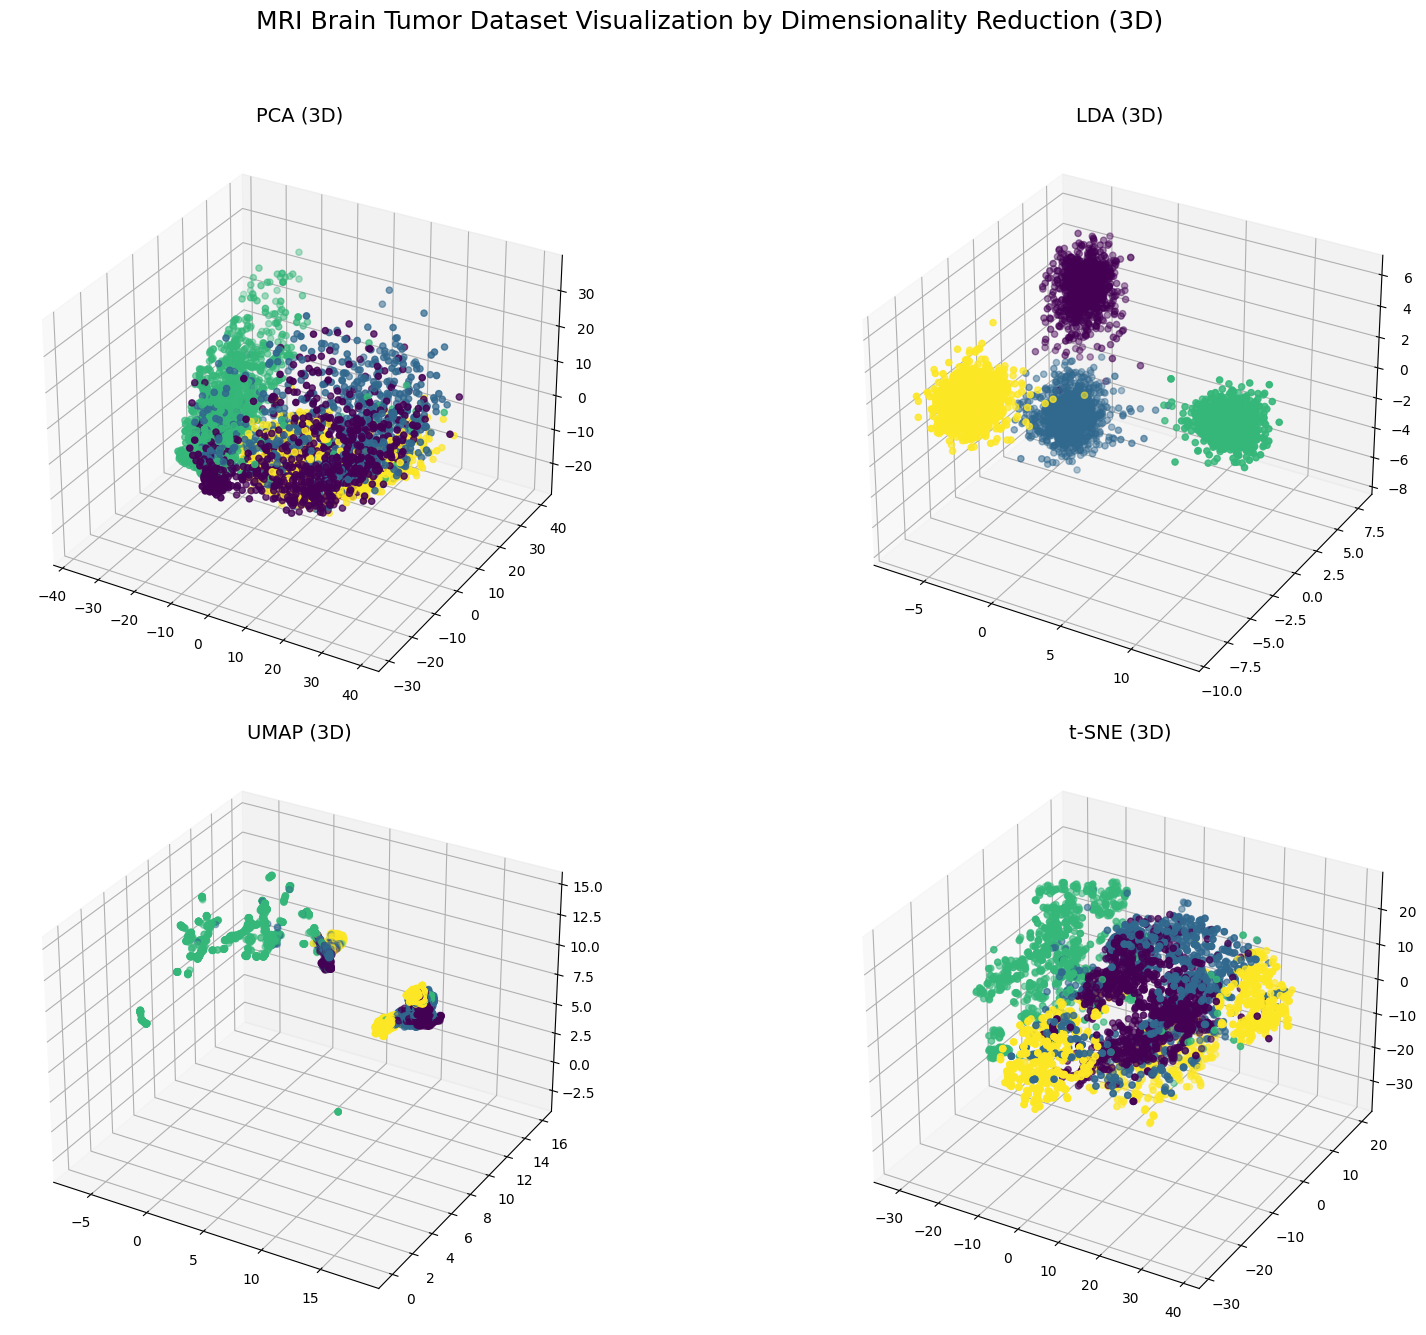

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Prevent OpenBLAS warning
os.environ["OMP_NUM_THREADS"] = "1"

# Dataset path
train_dir = '/kaggle/input/brain-tumor-mri-dataset/Training'
IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 32

# Data generator
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=False
)

# Feature extractor (ResNet50 without top layer)
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), pooling='avg')
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Extract features and labels
features = feature_extractor.predict(train_generator, verbose=1)
labels = train_generator.classes
class_labels = list(train_generator.class_indices.keys())

# Dimensionality Reduction (3D)
pca_3d = PCA(n_components=3)
features_pca_3d = pca_3d.fit_transform(features)

lda_3d = LDA(n_components=3)
features_lda_3d = lda_3d.fit_transform(features, labels)

umap_3d = umap.UMAP(n_components=3, random_state=42)
features_umap_3d = umap_3d.fit_transform(features)

tsne_3d = TSNE(n_components=3, random_state=42)
features_tsne_3d = tsne_3d.fit_transform(features)

# Consolidated 3D Plot (2x2)
fig = plt.figure(figsize=(18, 14))
fig.suptitle('MRI Brain Tumor Dataset Visualization by Dimensionality Reduction (3D)', fontsize=18)

# PCA
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter(features_pca_3d[:, 0], features_pca_3d[:, 1], features_pca_3d[:, 2], c=labels, cmap='viridis')
ax.set_title('PCA (3D)', fontsize=14)

# LDA
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter(features_lda_3d[:, 0], features_lda_3d[:, 1], features_lda_3d[:, 2], c=labels, cmap='viridis')
ax.set_title('LDA (3D)', fontsize=14)

# UMAP
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.scatter(features_umap_3d[:, 0], features_umap_3d[:, 1], features_umap_3d[:, 2], c=labels, cmap='viridis')
ax.set_title('UMAP (3D)', fontsize=14)

# t-SNE
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter(features_tsne_3d[:, 0], features_tsne_3d[:, 1], features_tsne_3d[:, 2], c=labels, cmap='viridis')
ax.set_title('t-SNE (3D)', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Found 4571 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 103ms/step


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


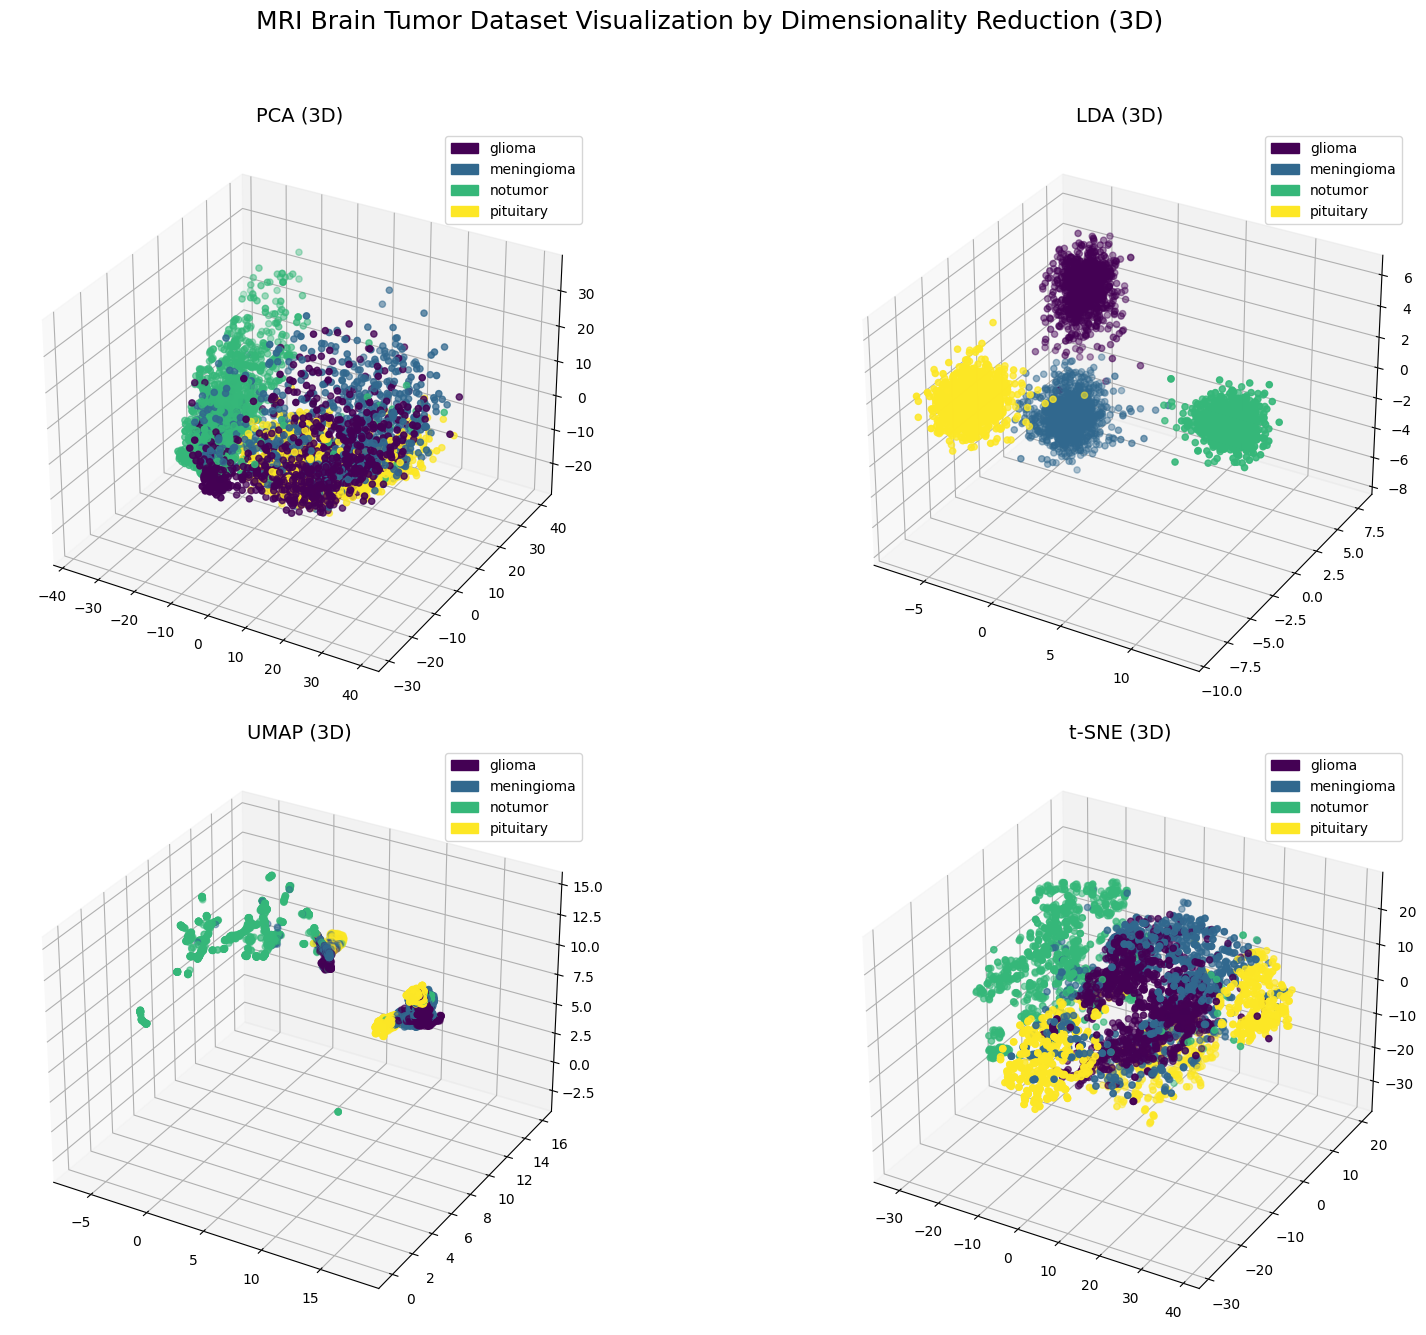

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from matplotlib.patches import Patch

# Prevent OpenBLAS warning
os.environ["OMP_NUM_THREADS"] = "1"

# Dataset path
train_dir = '/kaggle/input/brain-tumor-mri-dataset/Training'
IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 32

# Data generator
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=False
)

# Feature extractor
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), pooling='avg')
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Extract features and labels
features = feature_extractor.predict(train_generator, verbose=1)
labels = train_generator.classes
class_labels = list(train_generator.class_indices.keys())

# Create color map and patches
cmap = plt.get_cmap('viridis', len(class_labels))
colors = [cmap(i) for i in range(len(class_labels))]
legend_patches = [Patch(color=colors[i], label=class_labels[i]) for i in range(len(class_labels))]

# Dimensionality Reduction (3D)
pca_3d = PCA(n_components=3)
features_pca_3d = pca_3d.fit_transform(features)

lda_3d = LDA(n_components=3)
features_lda_3d = lda_3d.fit_transform(features, labels)

umap_3d = umap.UMAP(n_components=3, random_state=42)
features_umap_3d = umap_3d.fit_transform(features)

tsne_3d = TSNE(n_components=3, random_state=42)
features_tsne_3d = tsne_3d.fit_transform(features)

# Consolidated 3D Plot (2x2)
fig = plt.figure(figsize=(18, 14))
fig.suptitle('MRI Brain Tumor Dataset Visualization by Dimensionality Reduction (3D)', fontsize=18)

# PCA
ax = fig.add_subplot(2, 2, 1, projection='3d')
sc = ax.scatter(features_pca_3d[:, 0], features_pca_3d[:, 1], features_pca_3d[:, 2], c=labels, cmap='viridis')
ax.set_title('PCA (3D)', fontsize=14)
ax.legend(handles=legend_patches, loc='upper right')

# LDA
ax = fig.add_subplot(2, 2, 2, projection='3d')
sc = ax.scatter(features_lda_3d[:, 0], features_lda_3d[:, 1], features_lda_3d[:, 2], c=labels, cmap='viridis')
ax.set_title('LDA (3D)', fontsize=14)
ax.legend(handles=legend_patches, loc='upper right')

# UMAP
ax = fig.add_subplot(2, 2, 3, projection='3d')
sc = ax.scatter(features_umap_3d[:, 0], features_umap_3d[:, 1], features_umap_3d[:, 2], c=labels, cmap='viridis')
ax.set_title('UMAP (3D)', fontsize=14)
ax.legend(handles=legend_patches, loc='upper right')

# t-SNE
ax = fig.add_subplot(2, 2, 4, projection='3d')
sc = ax.scatter(features_tsne_3d[:, 0], features_tsne_3d[:, 1], features_tsne_3d[:, 2], c=labels, cmap='viridis')
ax.set_title('t-SNE (3D)', fontsize=14)
ax.legend(handles=legend_patches, loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


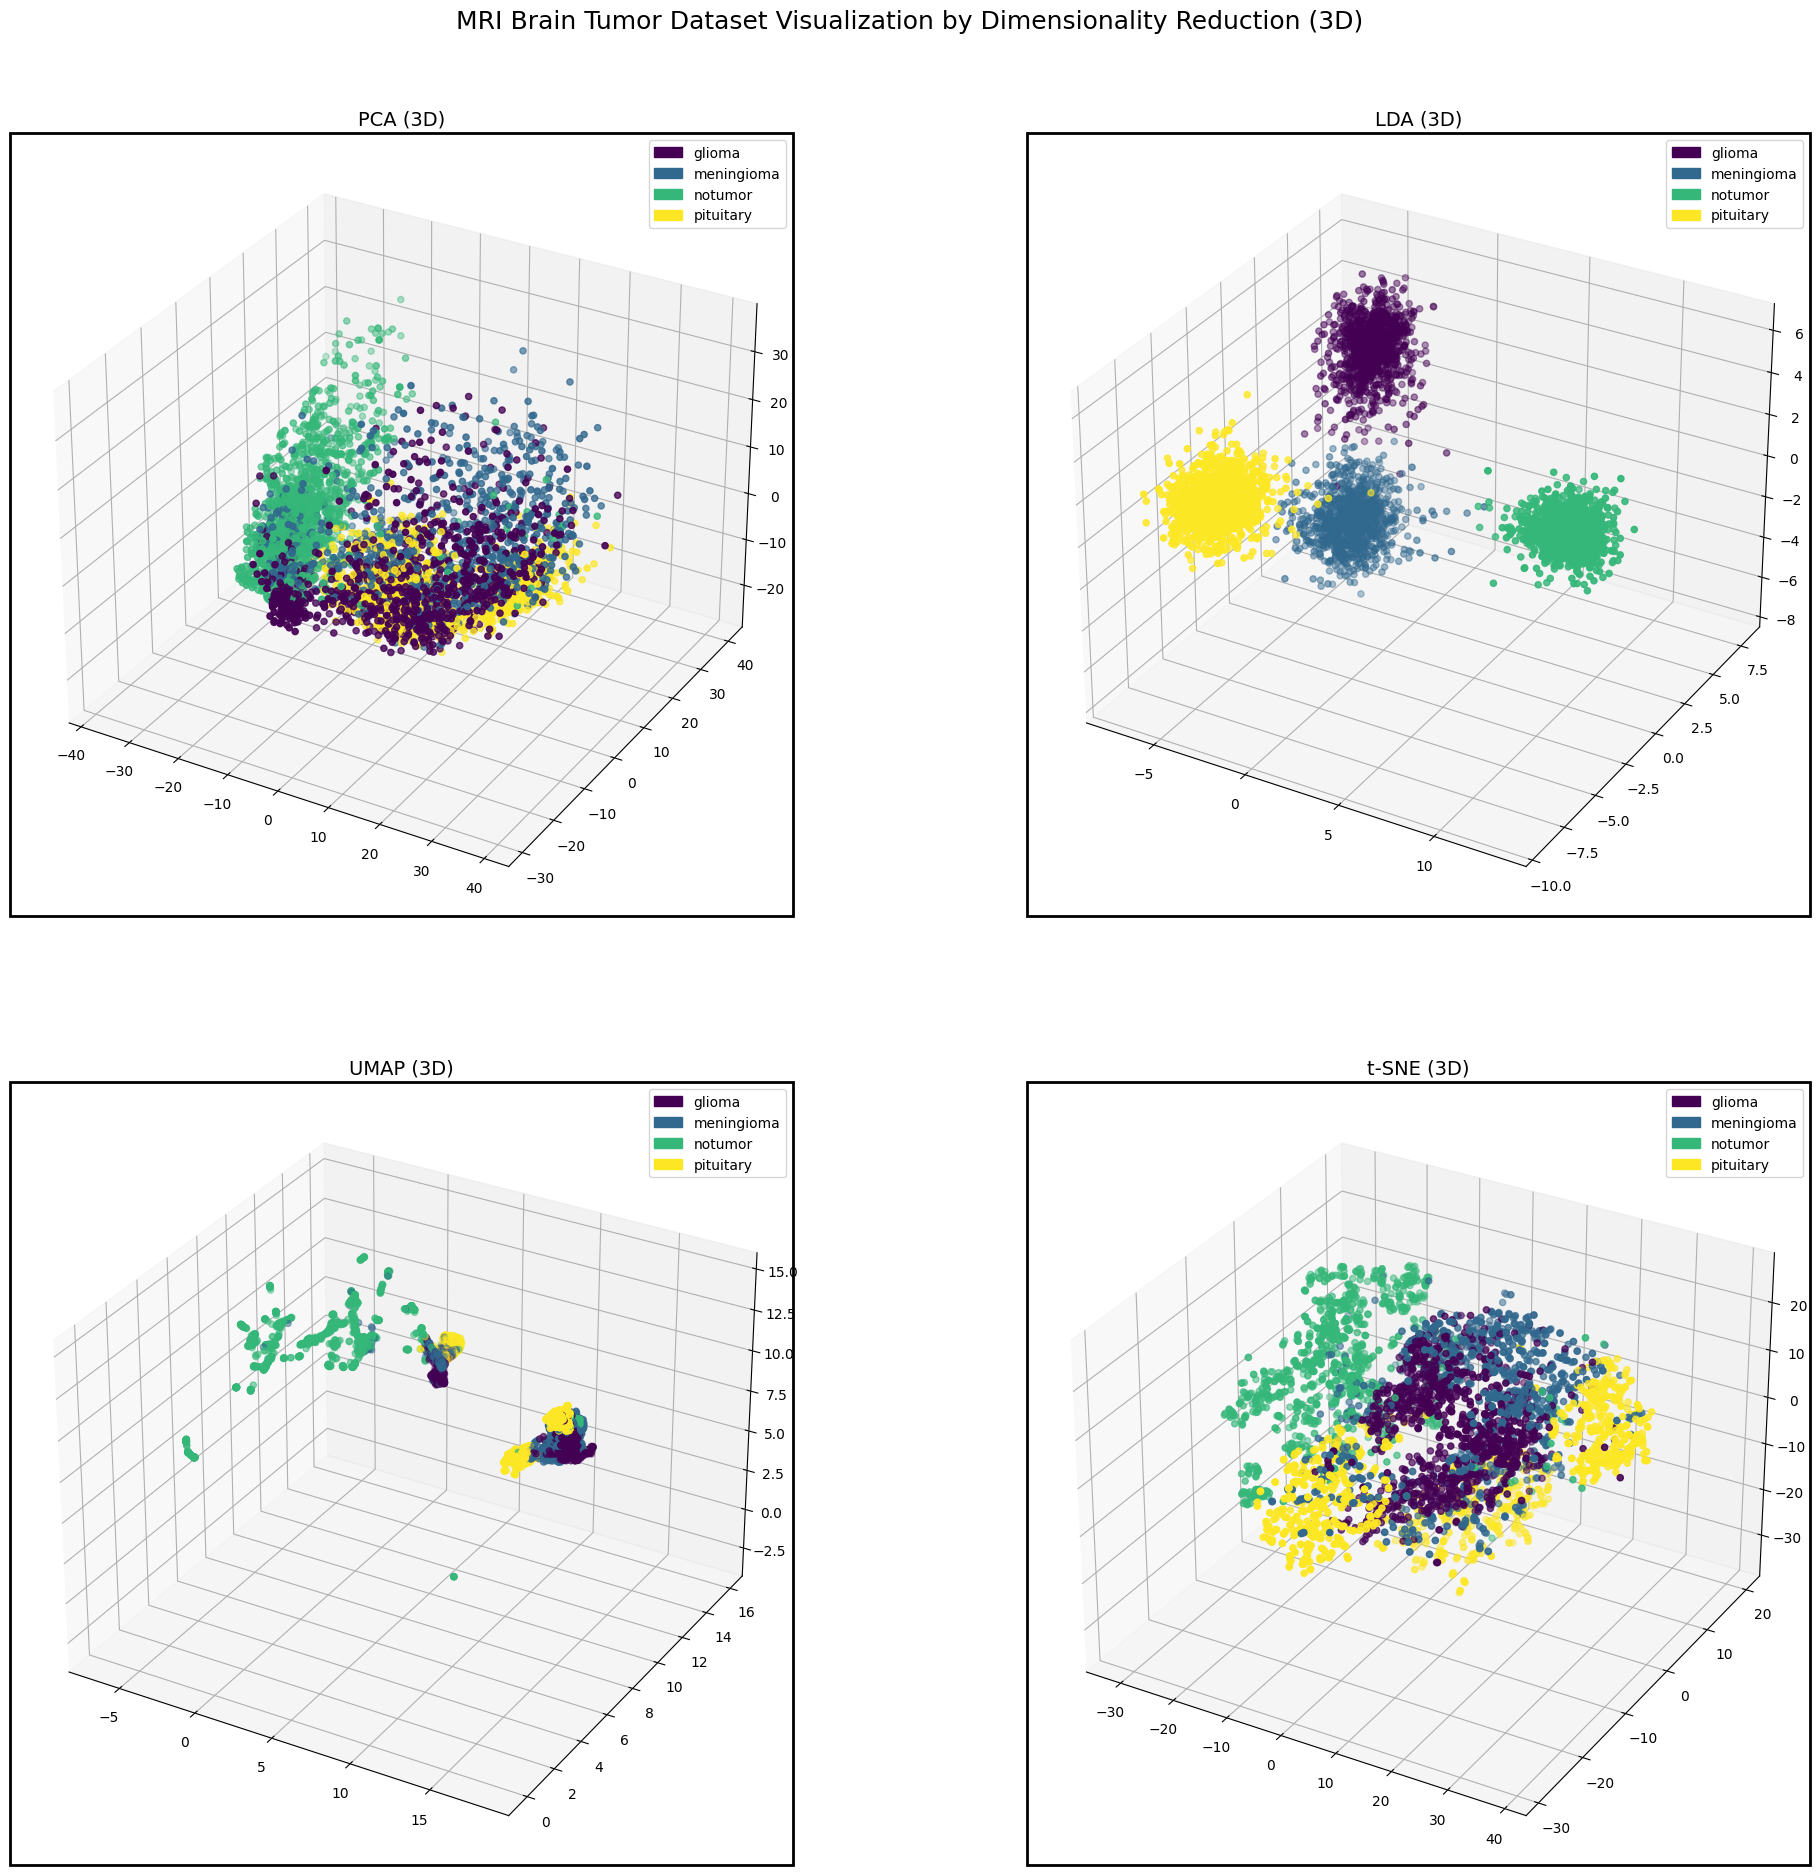

In [6]:
# Consolidated 3D Plot (2x2) with boundaries like table cells and reduced vertical space
fig = plt.figure(figsize=(20, 20))
fig.suptitle('MRI Brain Tumor Dataset Visualization by Dimensionality Reduction (3D)', fontsize=18)

titles = ['PCA (3D)', 'LDA (3D)', 'UMAP (3D)', 't-SNE (3D)']
feature_sets = [features_pca_3d, features_lda_3d, features_umap_3d, features_tsne_3d]

# Create each subplot with black border
for idx, (features_3d, title) in enumerate(zip(feature_sets, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection='3d')
    sc = ax.scatter(features_3d[:, 0], features_3d[:, 1], features_3d[:, 2], c=labels, cmap='viridis')
    ax.set_title(title, fontsize=14)
    ax.legend(handles=legend_patches, loc='upper right')
    
    # Add black border
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(2)

# Adjust layout manually to reduce vertical spacing
plt.subplots_adjust(top=0.92, bottom=0.05, left=0.05, right=0.95, hspace=0.2, wspace=0.3)
plt.show()
